# Search Tutorial

In [1]:
from pathlib import Path
from beak.remote import MMseqsSearch

# line magic for reloading modules
%load_ext autoreload
%autoreload 2

/opt/anaconda3/envs/beak/lib/python3.10/site-packages/seqlogo/seqlogo.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Create the search object

In [2]:
search = MMseqsSearch(host="shr-zion.stanford.edu", 
                      user="mbolivas",
                      key_path="~/.ssh/shr-zion")

# List available presets
search.list_presets()

,preset,description,parameters
0,default,Default MMseqs2 sensitivity (balanced speed/se...,"s=5.7, e=0.001"
1,fast,Fast search for close homologs,"s=4.0, e=0.001"
2,sensitive,More sensitive search (slower),"s=7.5, e=0.001"
3,exhaustive,Exhaustive search for remote homologs,"s=8.5, e=10, max_seqs=30000, min_seq_id=0.15, ..."
4,very_sensitive,Very sensitive (good for distant homologs),"s=8.0, e=0.01, max_seqs=1000"


Now, list available databases

In [3]:
search.list_databases()

,alias,database_name,path,exists,size
0,bfd,bfd-first_non_consensus_sequences.fasta,/srv/protein_sequence_databases/bfd-first_non_...,True,17G
1,gtdb,GTDB,/srv/protein_sequence_databases/GTDB,True,0
8,nt_rna,nt_rna_2023_02_23_clust_seq_id_90_cov_80_rep_s...,/srv/protein_sequence_databases/nt_rna_2023_02...,True,76G
9,pdb_seqres,pdb_seqres_2022_09_28.fasta,/srv/protein_sequence_databases/pdb_seqres_202...,True,223M
10,rfam,rfam_14_9_clust_seq_id_90_cov_80_rep_seq.fasta,/srv/protein_sequence_databases/rfam_14_9_clus...,True,218M
11,rnacentral,rnacentral_active_seq_id_90_cov_80_linclust.fasta,/srv/protein_sequence_databases/rnacentral_act...,True,13G
2,swissprot,swissprot,/srv/protein_sequence_databases/swissprot,True,200M
3,trembl,TrEMBL,/srv/protein_sequence_databases/TrEMBL,True,85G
4,uniprotkb,UniProtKB,/srv/protein_sequence_databases/UniProtKB,True,85G
5,uniref100,UniRef100,/srv/protein_sequence_databases/UniRef100,True,66G


### Query

Let's first create the query fasta file we'll use for searching.

In [4]:
test_fasta = Path("hAcyP2_quick_search.fasta")
test_fasta.write_text(""">hAcyP2
MSTAQSLKSVDYEVFGRVQGVCFRMYTEDEARKIGVVGWVKNTSKGTVTGQVQGPEDKVNSMKSWLSKVGSPSSRIDRTNFSNEKTISKLEYSNFSIRY
""")

108

Now we can submit the search job

In [5]:
# Use a preset
job_id = search.submit(
    query_file="hAcyP2_quick_search.fasta",
    database="uniprotkb",
    preset="fast",
    job_name="hAcyP2_quick_search",
    threads=30
)

📁 Created project: hacyp2_quick_search_706c6f63
Using preset: fast - Fast search for close homologs
Created remote directory: /home/mbolivas/beak_jobs/706c6f63
Uploading query file...
✓ Job submitted: hAcyP2_quick_search (ID: 706c6f63)
  Database: uniprotkb (/srv/protein_sequence_databases/UniProtKB)
  PID: 360754


List all jobs

In [6]:
search.list_jobs()

,job_id,name,status,database,submitted,runtime
2,706c6f63,hAcyP2_quick_search,RUNNING,uniprotkb,2025-12-18T10:44:47.135676,0:00:04
1,4ad272cd,hAcyP2_quick_search,COMPLETED,uniprotkb,2025-12-01T16:26:06.460613,"16 days, 18:18:44"
0,a9f50c62,hAcyP2_UniProtKB_exhaustive_search,COMPLETED,uniprotkb,2025-11-17T23:11:35.221008,"30 days, 11:33:16"


In [10]:
search.print_detailed_status(job_id)


Job: hAcyP2_quick_search (706c6f63)
Status: RUNNING | Runtime: 0:00:17

🔄 Aligning



Now download the job

In [13]:
results = search.get_results(job_id, download_sequences=True)

ValueError: Job not completed (status: RUNNING)

### Taxonomy

In [50]:
from beak.remote.search import MMseqsSearch
from beak.remote.taxonomy import MMseqsTaxonomy

In [52]:
# Initialize both
taxonomy = MMseqsTaxonomy(host="shr-zion.stanford.edu",
                          user="mbolivas",
                          key_path="~/.ssh/shr-zion"
                          )

In [53]:
# Get your search results (already done)
results = search.get_results(job_id, download_sequences=True)
hits_fasta = results['fasta']

# Now annotate taxonomy
tax_job_id = taxonomy.annotate_search_results(
    hits_fasta=hits_fasta,
    database='uniprotkb',
    job_name='hAcyP2_taxonomy'
)

print(f"Taxonomy job submitted: {tax_job_id}")

✓ Parsed 25144 alignments
Created remote directory: /home/mbolivas/beak_jobs/41e99766
Uploading query file...
✓ Job submitted: hAcyP2_taxonomy (ID: 41e99766)
  Database: uniprotkb (/srv/protein_sequence_databases/UniProtKB)
  PID: 238432
Taxonomy job submitted: 41e99766


In [64]:
# Monitor it
taxonomy.get_log(tax_job_id)

Files in job directory:
total 11744
drwxrwxr-x  3 mbolivas mbolivas    4096 Nov 18 05:06 .
drwxrwxr-x 32 mbolivas mbolivas    4096 Nov 18 05:06 ..
-rw-rw-r--  1 mbolivas mbolivas    6704 Nov 18 05:09 mmseqs.log
-rw-rw-r--  1 mbolivas mbolivas    6704 Nov 18 05:09 nohup.out
-rw-rw-r--  1 mbolivas mbolivas       7 Nov 18 05:06 pid.txt
-rw-rw-r--  1 mbolivas mbolivas 2488725 Nov 18 05:06 queryDB
-rw-rw-r--  1 mbolivas mbolivas       4 Nov 18 05:06 queryDB.dbtype
-rw-rw-r--  1 mbolivas mbolivas 2856736 Nov 18 05:06 queryDB_h
-rw-rw-r--  1 mbolivas mbolivas       4 Nov 18 05:06 queryDB_h.dbtype
-rw-rw-r--  1 mbolivas mbolivas  429701 Nov 18 05:06 queryDB_h.index
-rw-rw-r--  1 mbolivas mbolivas  411595 Nov 18 05:06 queryDB.index
-rw-rw-r--  1 mbolivas mbolivas  458393 Nov 18 05:06 queryDB.lookup
-rw-rw-r--  1 mbolivas mbolivas      14 Nov 18 05:06 queryDB.source
-rw-rw-r--  1 mbolivas mbolivas 5320315 Nov 18 05:06 query.fasta
-rwx--x--x  1 mbolivas mbolivas    1430 Nov 18 05:06 run.sh
-rw-rw

Check progress

In [70]:
# Watch with live progress
taxonomy.print_detailed_status(tax_job_id)


Job: hAcyP2_taxonomy (41e99766)
Type: Taxonomy | Status: COMPLETED | Runtime: 1:03:55



In [129]:
# Get results
tax_df = taxonomy.get_results(tax_job_id, parse=True, parse_lineage=True)
print(f"\nTaxonomic annotations:")

✓ Downloaded to taxonomy_41e99766/taxonomy_results.tsv
✓ Parsed taxonomy for 25145 sequences
✓ Parsed taxonomic lineage into ranks

Taxonomic annotations:


In [95]:
import pandas as pd
import seaborn as sns
from Bio import SeqIO

In [90]:
# The dataframe is already loaded
df = results['dataframe']
df

,query,target,identity,alignment_length,mismatches,gap_openings,q_start,q_end,t_start,t_end,evalue,bit_score
0,hAcyP2,P14621,0.960,99,4,0,1,99,1,99,2.346000e-57,202
1,hAcyP2,A0A140VJD7,0.960,99,4,0,1,99,1,99,2.346000e-57,202
2,hAcyP2,A0A2I3SXE1,0.953,99,5,0,1,99,1,99,8.308000e-57,201
3,hAcyP2,A0A2R9A8N1,0.953,99,5,0,1,99,1,99,8.308000e-57,201
4,hAcyP2,A0A6D2XJ62,0.953,99,5,0,1,99,1,99,8.308000e-57,201
...,...,...,...,...,...,...,...,...,...,...,...,...
25139,hAcyP2,A0A662SUK8,0.288,79,53,0,21,99,1,76,8.751000e+00,37
25140,hAcyP2,A0A524J2M0,0.273,86,59,0,14,99,19,100,8.751000e+00,37
25141,hAcyP2,A0A7J2LXD7,0.292,77,54,0,8,84,4,80,8.751000e+00,37
25142,hAcyP2,A0A535SP99,0.336,62,40,0,16,77,18,78,8.751000e+00,37


In [91]:
# Display basic info
print(f"Total hits: {len(df)}")
print(f"\nTop 10 hits:")
print(df.head(10)[['target', 'identity', 'evalue', 'bit_score']])

Total hits: 25144

Top 10 hits:
       target  identity        evalue  bit_score
0      P14621     0.960  2.346000e-57        202
1  A0A140VJD7     0.960  2.346000e-57        202
2  A0A2I3SXE1     0.953  8.308000e-57        201
3  A0A2R9A8N1     0.953  8.308000e-57        201
4  A0A6D2XJ62     0.953  8.308000e-57        201
5      K7A1C3     0.953  8.308000e-57        201
6  A0A2I3HUI6     0.945  4.037000e-56        199
7  A0A2K5HA34     0.940  1.042000e-55        198
8  A0A8C9I5E1     0.940  1.042000e-55        198
9  A0A2K6NGY7     0.940  1.042000e-55        198


<Axes: >

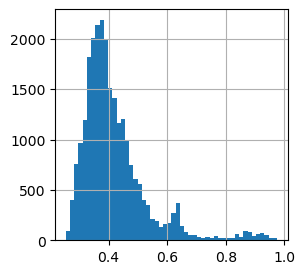

In [92]:
# Plot identity histogram
df['identity'].hist(bins=50, figsize=(3,3))

Merge on query

In [114]:
# Merge on query
merge_df = pd.merge(df, tax_df, left_on='target', right_on='query', how='left')
merge_df

,query_x,target,identity,alignment_length,mismatches,gap_openings,q_start,q_end,t_start,t_end,...,scientific_name,lineage,domain,kingdom,phylum,class,order,family,genus,species
0,hAcyP2,P14621,0.960,99,4,0,1,99,1,99,...,Homo sapiens,-_cellular organisms;-_Eukaryota;-_Opisthokont...,Eukaryota,Metazoa,Chordata,Mammalia,Primates,Hominidae,Homo,Homo sapiens
1,hAcyP2,A0A140VJD7,0.960,99,4,0,1,99,1,99,...,Homo sapiens,-_cellular organisms;-_Eukaryota;-_Opisthokont...,Eukaryota,Metazoa,Chordata,Mammalia,Primates,Hominidae,Homo,Homo sapiens
2,hAcyP2,A0A2I3SXE1,0.953,99,5,0,1,99,1,99,...,Pan,-_cellular organisms;-_Eukaryota;-_Opisthokont...,Eukaryota,Metazoa,Chordata,Mammalia,Primates,Hominidae,Pan,None
3,hAcyP2,A0A2R9A8N1,0.953,99,5,0,1,99,1,99,...,Pan,-_cellular organisms;-_Eukaryota;-_Opisthokont...,Eukaryota,Metazoa,Chordata,Mammalia,Primates,Hominidae,Pan,None
4,hAcyP2,A0A6D2XJ62,0.953,99,5,0,1,99,1,99,...,Pan,-_cellular organisms;-_Eukaryota;-_Opisthokont...,Eukaryota,Metazoa,Chordata,Mammalia,Primates,Hominidae,Pan,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25139,hAcyP2,A0A662SUK8,0.288,79,53,0,21,99,1,76,...,Thermoproteota archaeon,-_cellular organisms;-_Archaea;k_Thermoproteat...,Archaea,Thermoproteati,Thermoproteota,None,None,None,None,Thermoproteota archaeon
25140,hAcyP2,A0A524J2M0,0.273,86,59,0,14,99,19,100,...,Anaerolineales bacterium,-_cellular organisms;-_Bacteria;k_Bacillati;p_...,Bacteria,Bacillati,Chloroflexota,Anaerolineae,Anaerolineales,None,None,Anaerolineales bacterium
25141,hAcyP2,A0A7J2LXD7,0.292,77,54,0,8,84,4,80,...,Thermoproteota archaeon,-_cellular organisms;-_Archaea;k_Thermoproteat...,Archaea,Thermoproteati,Thermoproteota,None,None,None,None,Thermoproteota archaeon
25142,hAcyP2,A0A535SP99,0.336,62,40,0,16,77,18,78,...,Chloroflexota bacterium,-_cellular organisms;-_Bacteria;k_Bacillati;p_...,Bacteria,Bacillati,Chloroflexota,None,None,None,None,Chloroflexota bacterium


Plot sequence identity distribution by taxon

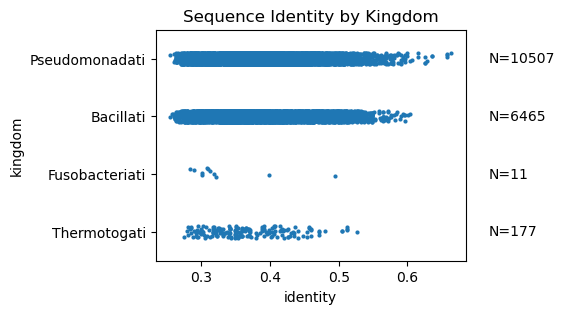

In [128]:
# Plot stripplot of identities by phylum
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,3))

# Filter for selection tax and plot by lower tax
plt_df = merge_df[merge_df['domain'] == 'Bacteria'].copy()
current_tax = 'kingdom'

sns.stripplot(data=plt_df, 
              x='identity', 
              y=current_tax, 
              jitter=True, 
              size=3,
                ax=ax
                )

# Plot accession P14621 in red
accession_to_highlight = 'P14621'
highlight_data = plt_df[plt_df['target'] == accession_to_highlight]
sns.scatterplot(data=highlight_data,
                x='identity',
                y=current_tax,
                color='red',
                s=100,
                ax=ax,
                label=accession_to_highlight,
                zorder=10
                )

# Plot N to the right of the stripplot
for taxon, group in plt_df.groupby(current_tax):
    n = len(group)
    ax.text(ax.get_xlim()[1] * 1.05, taxon, f'N={n}', va='center')

ax.set_title(f'Sequence Identity by {current_tax.capitalize()}')

plt.show()